# Notebook to sort the features according to their Feature Importance of the RF algorithm 

This notebook is used to sort the features according to their Feature Importance of the RF algorithm and create all the resulting tabular datasets.

Input: 
- < ../2-Windowing/dataset/%d"%DeltaT+".pkl"> the best dataset according to the previous Grid Search i.e., 2-Windowing

Output: 

- < "dataset/%d.pkl"> all datasets composed by n features from 1 up to all the features available. n features are selected by picking the first n from the FeaturesOrder list. Features are ordered according to the RF algorithm.

In [2]:
import pandas as pd
import numpy as np
import pathlib
import pickle
import sys
import os 

%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

CurrentPath = str(pathlib.Path().absolute().parent)
sys.path.insert(1, CurrentPath+'/1-SignalSelection/functions')
sys.path.insert(1, CurrentPath+'/classes/public')

import signalSelectionRF as RF

RF - Over
Plot final variables' importance...


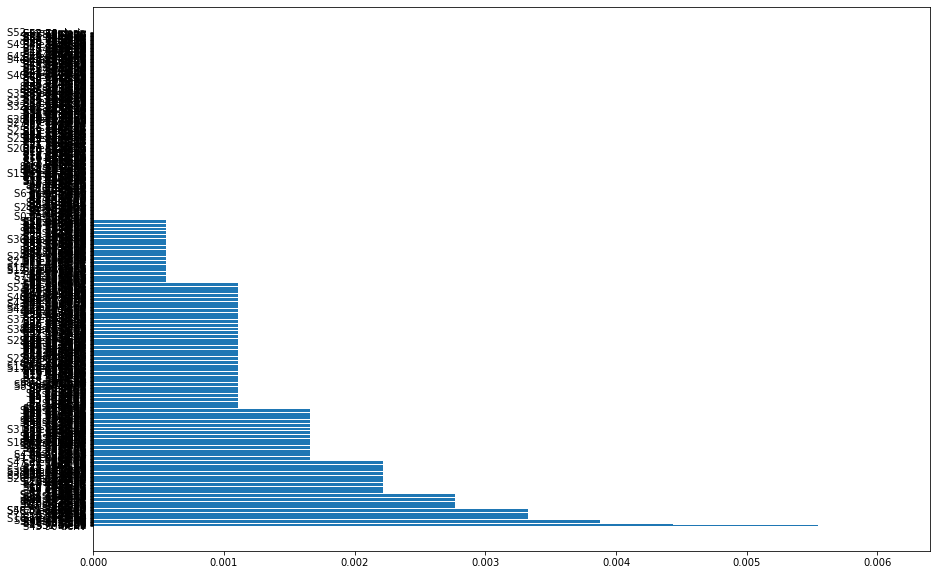

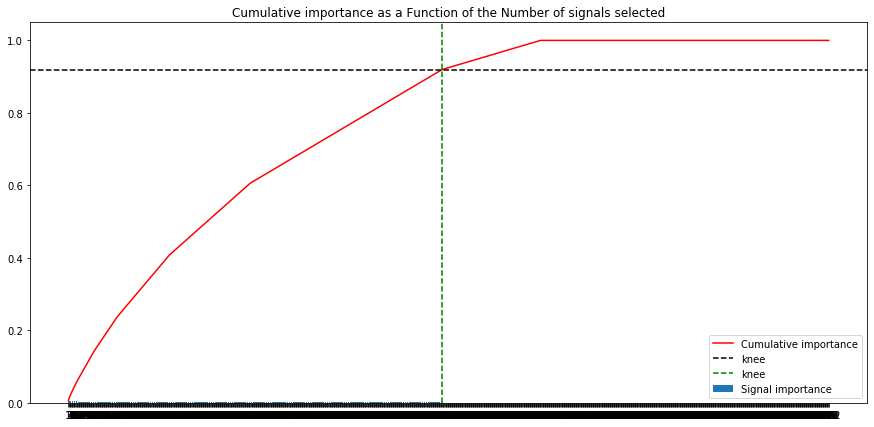

Knee:  552


In [3]:
DeltaT = "60"

origingal_df = pickle.load(open("../2-Windowing/dataset/%s"%DeltaT+".pkl","rb"))
selector = RF.signalSelectionRF(origingal_df)
FeaturesOrder = selector.select()

if not os.path.exists('dataset'):
    os.makedirs('dataset')    

for i in range(1,len(FeaturesOrder)):
    Xnp = np.array(origingal_df[FeaturesOrder[:i]])

    df = pd.DataFrame.from_records(Xnp)
    df.columns = FeaturesOrder[:i]

    df.insert(loc=0, column='ExpID', value=list(origingal_df.ExpID))
    df['Label']=list(origingal_df.Label)
    pickle.dump(df,open("dataset/%d.pkl"%i,"wb"))     
